<a href="https://colab.research.google.com/github/AlekseevaTatiana23/AlekseevaTatiana23.github.io/blob/main/HT8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Найдите ковариацию этих двух величин с помощью элементарных действий, а затем с помощью функции cov из numpy Полученные значения должны быть равны. Найдите коэффициент корреляции Пирсона с помощью ковариации и среднеквадратичных отклонений двух признаков, а затем с использованием функций из библиотек numpy и pandas.

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

cov1=np.mean(zp*ks)-np.mean(zp)*np.mean(ks)
cov1


9157.839999999997

In [7]:
cov2=np.cov(zp, ks, ddof=0)
cov2

array([[ 3494.64,  9157.84],
       [ 9157.84, 30468.89]])

Найдем коэффициент корреляции Пирсона

In [15]:
std_zp=np.std(zp,ddof=0)
std_ks=np.std(ks,ddof=0)
r=cov1/(std_zp*std_ks)
print(f'Коэффициент корреляции r = {r: .5f}')

Коэффициент корреляции r =  0.88749


In [12]:
r_func=np.corrcoef(zp, ks)
print(f'Коэффициент корреляции r = {r_func}')

Коэффициент корреляции r = [[1.         0.88749009]
 [0.88749009 1.        ]]


In [16]:
df=pd.DataFrame(data={'zp':zp, 'ks':ks})
df

,zp,ks
0,35,401
1,45,574
2,190,874
3,200,919
4,40,459
5,70,739
6,54,653
7,150,902
8,120,746
9,110,832


In [18]:
df.corr()

,zp,ks
zp,1.00000,0.88749
ks,0.88749,1.00000


<function matplotlib.pyplot.show(close=None, block=None)>

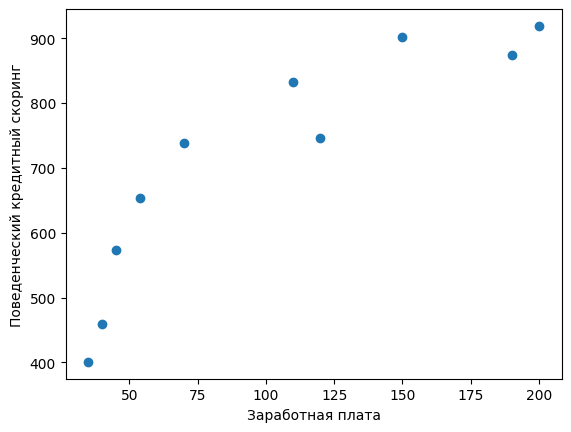

In [23]:
plt.scatter(zp, ks)
plt.xlabel('Заработная плата')
plt.ylabel('Поведенческий кредитный скоринг')
plt.show

Исходя из графика и коэффициента корреляции видна прямая зависимость между двумя величинами: чем выше зп, тем выше поведенческий кредитный скоринг

# 2.Измерены значения IQ выборки студентов, обучающихся в местных технических вузах: 131, 125, 115, 122, 131, 115, 107, 99, 125, 111. Известно, что в генеральной совокупности IQ распределен нормально. Найдите доверительный интервал для математического ожидания с надежностью 0.95.

In [31]:
iq=np.array([131, 125, 115, 122, 131, 115, 107, 99, 125, 111])
confidens=0.95
alpha=1-confidens
print(f'alpha: {alpha: .2f}')

alpha:  0.05


In [27]:
D=np.var(iq, ddof=1)

def t_table(alpha, len_arr):
    return stats.t.ppf(1-alpha/2, len_arr-1)

print(f'Табличное значение t-критерия для 95%-го доверительного интервала данной выборки: {t_table(alpha, len(iq)): .3f}')

Табличное значение t-критерия для 95%-го доверительного интервала данной выборки:  2.262


In [40]:
iq_mean=np.mean(iq)

In [50]:
L=iq_mean-t_table(alpha, len(iq))*np.sqrt(D/len(iq))
U=iq_mean+t_table(alpha, len(iq))*np.sqrt(D/len(iq))

print(f'95%-й доверительный интервал для истинного значения IQ: [{round(L,3), round(U,3)}]')

95%-й доверительный интервал для истинного значения IQ: [(114.523, 121.677)]


# 3.Известно, что рост футболистов в сборной распределен нормально с дисперсией генеральной совокупности, равной 25 кв.см. Объем выборки равен 27, среднее выборочное составляет 174.2. Найдите доверительный интервал для математического ожидания с надежностью 0.95.

In [45]:
mean=174.2
n=27
D=25
confidens=0.95
alpha=1-confidens
print(f'alpha: {alpha: .2f}')


alpha:  0.05


По таблице z-значений при 95% доверительном интервале значение z(alpha/2)=1.96

In [48]:
z=1.96
L=mean-z*np.sqrt(D/n)
U=mean+z*np.sqrt(D/n)

print(f'95%-й доверительный интервал: [{round(L,3), round(U,3)}]')

95%-й доверительный интервал: [(172.314, 176.086)]
